In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### 시 - 각 - 화
- Axes : 그래프가 그려지는 Figure의 하위 섹션. title, xlabel, ylabel 등을 통제
- Axis : Axes의 하위 요소 : 그래프의 척도를 나타내는 숫자 선으로, X, Y, Z Axis 를 갖는다.
- Label : Figure의 다양한 요소들의 이름. X Axis Label, Y Axis label, Graph Label 등
- Legend : Axes 내부에 여러 그림이 있다면 입력 값에 따라 각각의 Label이 있음
- Title : 각 Axes에 주어진 이름
- Ticklabels : Bin을 표현해주는 값을 의미 
    - 예를 들어 0 ~ 4 까지 구간을 나누고 0 ~ 1 에서 또 0.25, 0.5, 0.75를 나눴다면 1, 2, 3, 4는 Major Ticks
    - 0.25, 0.5, 0.75 등은 Minor Ticks를 의미하게 되는 것
    - 이들의 이름을 Ticklabel이라고 한다
- Spines : Figure의 가장자리. 각 Axes에는 4개의 Spines가 있다(TBLR)
- Grid : 영역을 나누는 격자다

In [4]:
import yfinance as yf
data = yf.download('AAPL', '2019-08-01', '2020-08-01')
ts = data['Open']
print(ts.head())

[*********************100%***********************]  1 of 1 completed
Date
2019-07-31    54.105000
2019-08-01    53.474998
2019-08-02    51.382500
2019-08-05    49.497501
2019-08-06    49.077499
Name: Open, dtype: float64


In [5]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-31,54.105000,55.342499,52.825001,53.259998,52.058987,277125600
2019-08-01,53.474998,54.507500,51.685001,52.107498,50.932468,216071600
2019-08-02,51.382500,51.607498,50.407501,51.005001,49.854839,163448400
2019-08-05,49.497501,49.662498,48.145000,48.334999,47.245049,209572000
2019-08-06,49.077499,49.517502,48.509998,49.250000,48.139408,143299200
...,...,...,...,...,...,...
2020-07-27,93.709999,94.904999,93.480003,94.809998,93.778023,121214000
2020-07-28,94.367500,94.550003,93.247498,93.252502,92.237488,103625600
2020-07-29,93.750000,95.230003,93.712502,95.040001,94.005524,90329200


### Matplotlib 구현 방법은 2가지가 있다.
1. pyplot : 모듈에 있는 함수들을 불러와서 구현. 간편함
2. OOP API : OOP 라이브러리를 직접 활용하는 방법. 각 구성 요소를 다양하게 제어하고 싶다면 이를 사용함

#### Pyplot API 이용하기

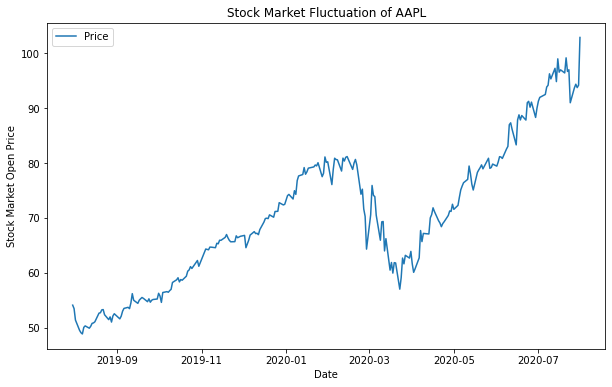

In [6]:
plt.figure(figsize = (10, 6))
plt.plot(ts)
plt.legend(labels = ['Price'], loc = 'best')
plt.title("Stock Market Fluctuation of AAPL")
plt.xlabel('Date')
plt.ylabel('Stock Market Open Price')
plt.show()

### 2. OO API로 만들기
#### 과정
1. BackendLayer의 FigureCanvas를 불러온다
2. ArtistLayer의 Figure 영역을 불러온다
3. Figure 객체를 만들어 생성자를 만든다
4. 가상 데이터를 만든다.
5. ArtistLayer의 Axes 객체를 만든다.
6. Axes의 hist() 객체를 호출한다.
7. AXes의 set_title() 객체를 호출한다.
8. Figure 객체에 구현된 Axes를 담아 패키징화해 내보낸다.

In [8]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas # 1
from matplotlib.figure import Figure # 2
fig = Figure() # 3

import numpy as np
np.random.seed(6)

x = np.random.randn(20000) # 4
ax = fig.add_subplot(111) # 5
ax.hist(x, 100) # 6
ax.set_title('Artist Layer Histogram') # 7
fig.savefig("Matplotlib_histogram.png") # 8

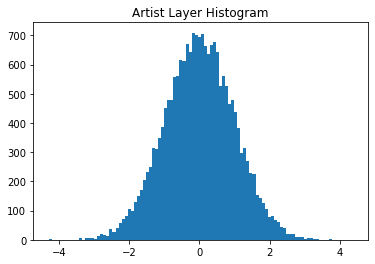

In [11]:
display(fig)

#### 더 복잡해지면 모를까 일단 여기서는 큰 차이는 모르겠다..?

### 3. Pyplot + OO API 같이 이용
- plt로 Figure 객체를 만든다 : Backend Layer를 호출한다
- Axes를 선언한다 : Artist Layer를 호출한다

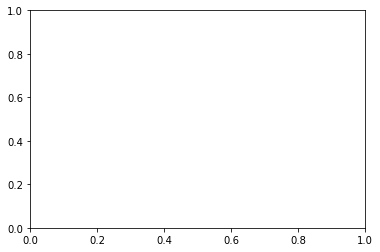

In [12]:
# fig = plt.figure() # figure를 plt를 이용해 만듦
# ax = fig.subplots()

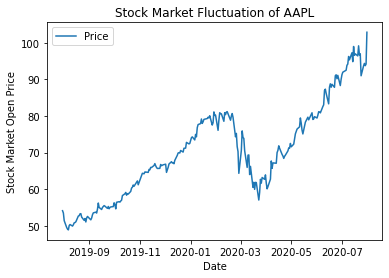

In [13]:
# 위 코드를 합친 게 우리가 맨날 쓰는 그거다
# 그니까 쉽게 생각하면 fig는 우리가 구현하는 그래프 바깥의 객체고
# ax는 우리가 구현하는 그래프 자체를 의미한다고 보면 됨

fig, ax = plt.subplots()

ax.plot(ts)
ax.set_title('Stock Market Fluctuation of AAPL')
ax.legend(labels = ['Price'], loc = 'best')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Market Open Price')
plt.show()

#### 막대그래프(Bar Plot)

In [15]:
import calendar

month_list = list(range(1, 13))
sold_list = [300, 400, 550, 900, 600, 960, 900, 910, 800, 700, 550, 450]

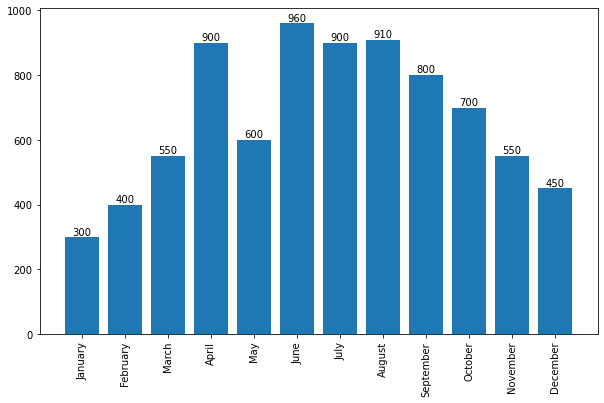

In [20]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.xticks(month_list, calendar.month_name[1:13], rotation = 90)
plot = ax.bar(month_list, sold_list)
for rect in plot:
    height = rect.get_height()
    
    # 그래프에 주석 추가하기
    ax.text(rect.get_x() + rect.get_width()/2., # 주석 위치 X 좌표
            1.002*height, # 주석 위치 Y 좌표
            '%d'%int(height), # 주석의 값
            ha='center', # HorizontalAlignment, 'center', 'left', 'right' 중 하나
            va='bottom') # VerticalAlignment

plt.show()

#### 산점도 그래프(Scatter Plot)
- seaborn에 있는 데이터를 불러옴

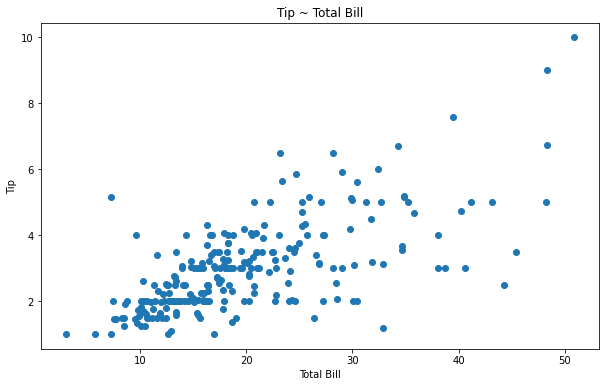

In [25]:
tips = sns.load_dataset("tips")
x = tips['total_bill']
y = tips['tip']

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y)
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
ax.set_title('Tip ~ Total Bill')

# fig.show() # <ipython-input-24-eb319fde3690>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
plt.show()

Text(0.5, 1.0, 'Tip ~ Total Bill')

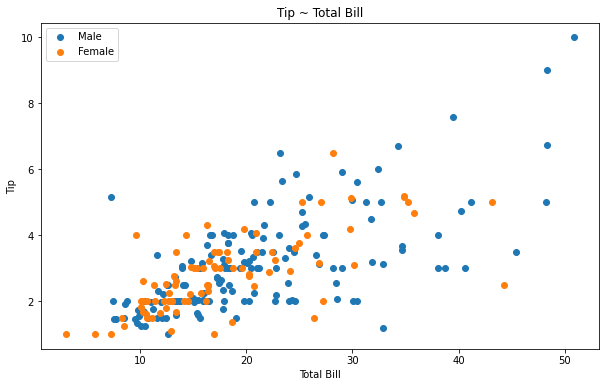

In [30]:
# 사실 데이터를 봐야 알 수 있는 내용이지만.. 예를 들어 성에 따라 그룹을 나누고 싶다면
x1 = tips.loc[tips['sex'] == 'Male']['total_bill']
y1 = tips.loc[tips['sex'] == 'Male']['tip']
x2 = tips.loc[tips['sex'] == 'Female']['total_bill']
y2 = tips[tips['sex'] == 'Female']['tip']

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x1, y1, label = 'Male')
ax.scatter(x2, y2, label = 'Female')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
ax.legend()
ax.set_title('Tip ~ Total Bill')

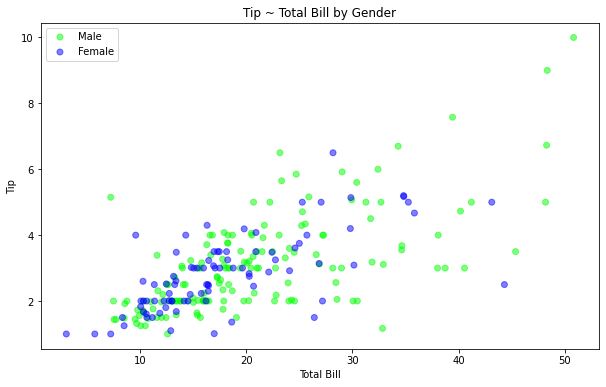

In [33]:
# 동일한 내용을 책은 다음처럼 구현함
x = tips['total_bill']
y = tips['tip']

tips['sex_color'] = tips['sex'].map({"Female":"#0000FF", "Male" : "#00FF00"})

fig, ax = plt.subplots(figsize = (10, 6))
for label, data in tips.groupby('sex'):
    ax.scatter(data['total_bill'], data['tip'], label = label,
              color = data['sex_color'], alpha = 0.5)
    ax.set_xlabel('Total Bill')
    ax.set_ylabel('Tip')
    ax.set_title("Tip ~ Total Bill by Gender")

ax.legend()
# fig.show()
plt.show()

#### 히스토그램(Histogram)

In [34]:
titanic = sns.load_dataset('titanic')
age = titanic['age']

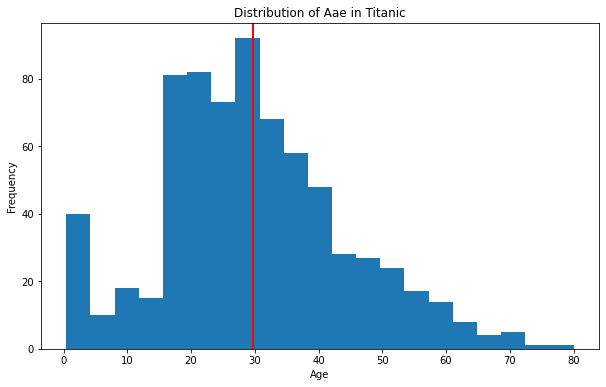

In [35]:
nbins = 21
fig, ax = plt.subplots(figsize = (10, 6))
ax.hist(age, bins = nbins)
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Aae in Titanic")
ax.axvline(x = age.mean(), linewidth = 2, color = 'r') # 붉은 선
# fig.show()
plt.show()

#### 박스플롯(BoxPlot)
- 최솟값, (1, 2, 3)분위값, 최댓값
- IQR : InterQuartile Range, 제 3사분위 값 - 제 1 사분위 값 (박스가 형성되는 지점)
    - IQR은 Boxplot의 Box 위 아래 직선의 범위를 지정(기본 : 각각 박스 범위의 1.5배)하며 이를 벗어난 값을 이상치Outlier라고 한다.

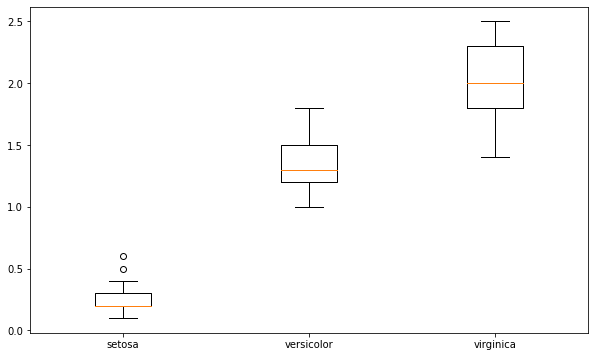

In [37]:
iris = sns.load_dataset('iris')

data = [iris[iris['species'] == 'setosa']['petal_width'],
       iris[iris['species'] == 'versicolor']['petal_width'],
       iris[iris['species'] == 'virginica']['petal_width']]

fig, ax = plt.subplots(figsize = (10, 6))
ax.boxplot(data, labels=['setosa', 'versicolor', 'virginica'])

# fig.show()
plt.show()

#### 히트맵(HeatMap)
- 예제는 상관행렬을 히트맵으로 표시
- 상관 행렬 : 각 행과 열의 값 간의 관계 강도

<ipython-input-40-30b48ee71d94>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(flights.columns, rotation = 20)
<ipython-input-40-30b48ee71d94>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(flights.index, rotation = 10)


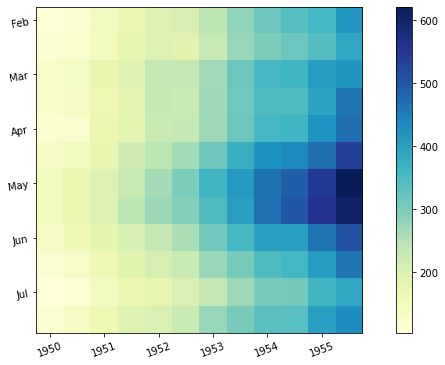

In [40]:
flights = sns.load_dataset('flights')
flights = flights.pivot('month', 'year', 'passengers')
fig, ax = plt.subplots(figsize = (12, 6))
im = ax.imshow(flights, 
               cmap = 'YlGnBu') # cmap의 종류는 matplotlib의 colormap을 참조
ax.set_xticklabels(flights.columns, rotation = 20)
ax.set_yticklabels(flights.index, rotation = 10)
fig.colorbar(im)

# fig.show()
plt.show()

### Seaborn 라이브러리
- DF를 리스트로 변환하지 않고 처리할 수 있게끔 한 게 seaborn 라이브러리
- matplotlib 기반으로 만들어졌고, pd와 매우 밀접하게 연결됨

#### 1. 산점도 + 회귀선

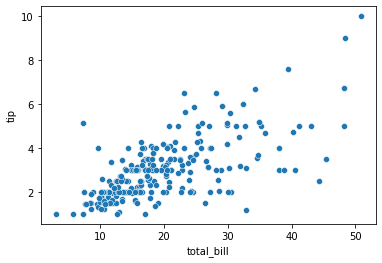

In [41]:
tips = sns.load_dataset('tips')

sns.scatterplot(x = 'total_bill', 
                y = 'tip', 
                data = tips) # 데이터프레임을 지정하면 x, y는 feature의 이름만으로 호출할 수 있음
plt.show()

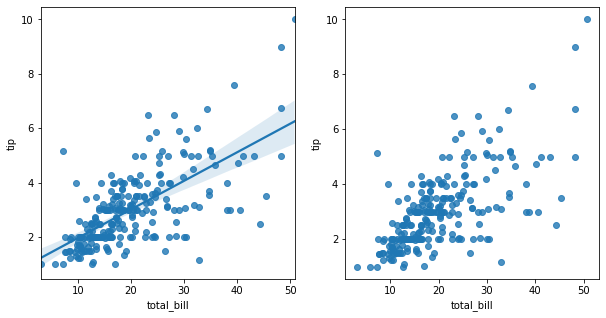

In [42]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.regplot(x = 'total_bill',
           y = 'tip',
           data = tips,
           ax = ax[0], # ax도 regplot 내부에서 파라미터로 집어넣는다
           fit_reg = True)

sns.regplot(x='total_bill',
           y = 'tip',
           data = tips,
           ax = ax[1],
            fit_reg = False)

plt.show()

### Matplotlib와 Seaborn의 경계가 모호할 수 있음
- 이 헷갈리는 지점도 객체지향으로 접근하면 도움이 된다

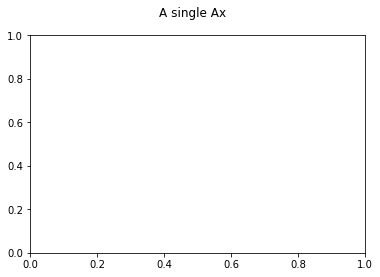

In [43]:
fig, ax = plt.subplots()
fig.suptitle('A single Ax')
plt.show()

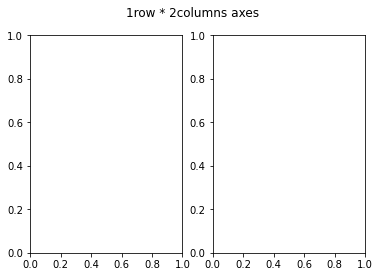

In [46]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('1row * 2columns axes')
fig.show()

<ipython-input-47-0c5562399b49>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


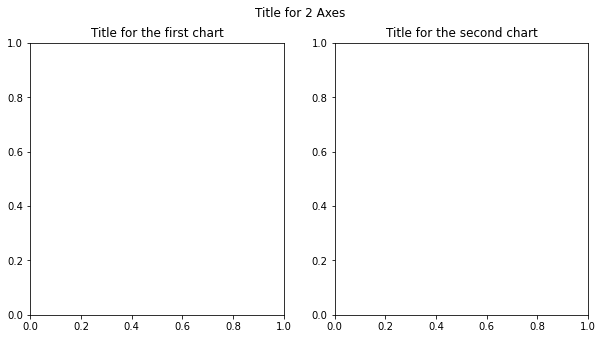

In [47]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle('Title for 2 Axes')
ax[0].set_title('Title for the first chart')
ax[1].set_title('Title for the second chart')
fig.show()

#### 위 과정은 모두 matplotlib에 의해 구현된 것임
- <b>ax 내부는 sns로 구현하면 되는 것</b>
- 그 과정은 위에서 구현한 것과 동일하니까 생략

### 2. 히스토그램 / 커널 밀도 그래프
- displot() : 기본값으로 히스토그램과 커널 밀도 함수를 그래프로 출력함
    - 커널 밀도 함수의 면적은 1이 된다
    - 히스토그램의 y축은 count, 커널 밀도 함수의 y축은 Density(비율인 듯?)임에 주목

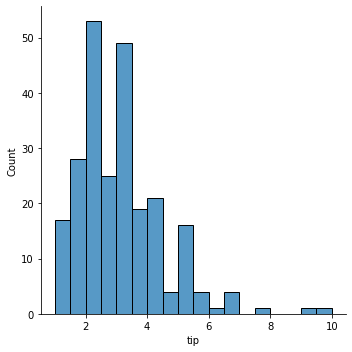

In [48]:
sns.displot(x= 'tip', data = tips)
plt.show()

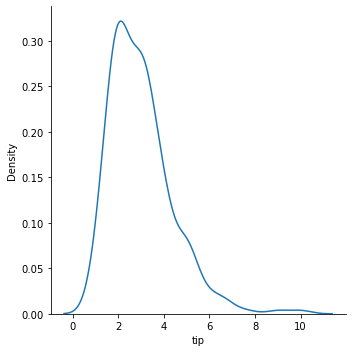

In [49]:
# 커널 밀도 그리기 : kind = 'kde' 파라미터 추가 (kernel density estimation)
sns.displot(x='tip', kind = 'kde', data = tips)
plt.show()

### 3. 박스 플롯 그래프
- boxplot()이나 violinplot()으로 구현 가능
- swarmplot() 도 있는데, 이는 데이터의 분포도 같이 확인할 수 있다. Alpha 값으로 투명도 조절 가능

<AxesSubplot:xlabel='day', ylabel='total_bill'>

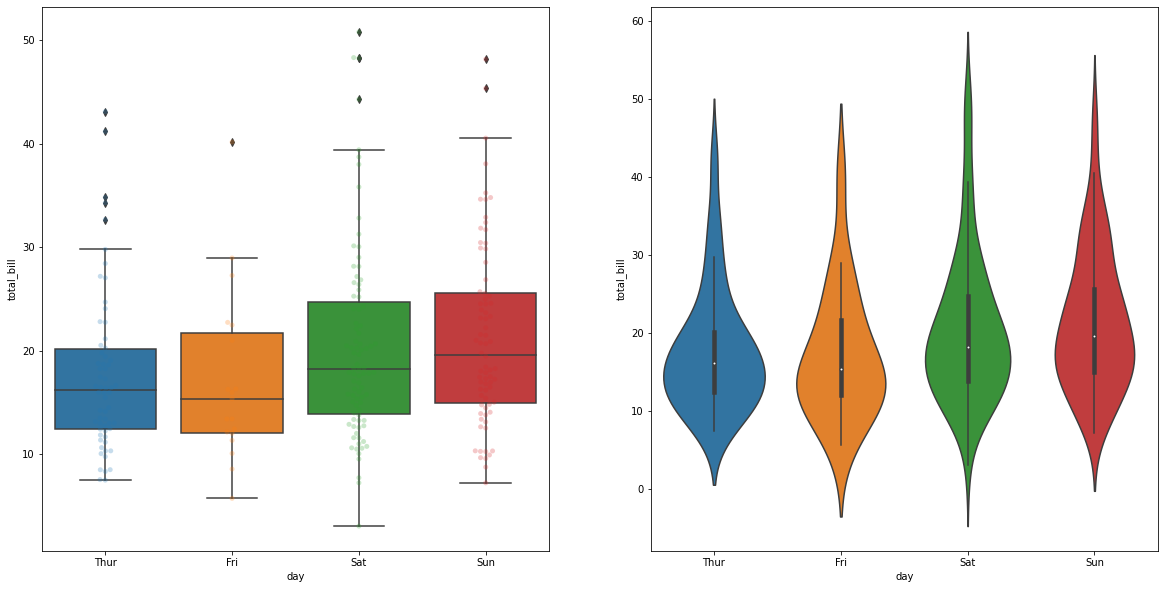

In [56]:
# 머쓱; swarmplot은 분포도를, boxplot은 박스 플롯을 그리며

fig, ax = plt.subplots(1, 2, figsize = (20, 10))
sns.boxplot(x='day', y='total_bill', data = tips, 
            ax = ax[0]
           )
sns.swarmplot(x='day', y='total_bill', data = tips, alpha = .25, 
              ax = ax[0]
             )

sns.violinplot(x='day', y='total_bill', data = tips, 
            ax = ax[1]
           )
# violinplot에서는 swarmplot이 큰 의미가 없다. violinplot의 너비 자체가 데이터 분포를 의미하고 있기 때문.

# sns.swarmplot(x='day', y='total_bill', data = tips, alpha = .25, 
#               ax = ax[1]
#              )

### 4. 막대그래프
#### 여기부터 본격적이긴 해~
- 탐색적 자료 분석 EDA를 하기 위해 조금 난이도를 올린다
- 막대그래프의 구현 자체는 countplot()으로 한다.

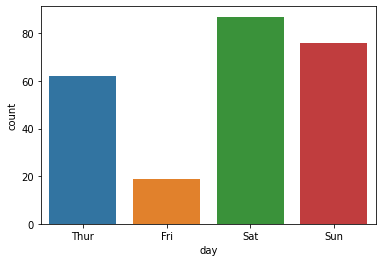

In [57]:
sns.countplot(x = 'day', data = tips)
plt.show()

<b>값이 많은 순서대로 나열하고 싶다면 countplot의 order 파라미터를 이용한다.</b>
- 다음은 그 전에 어떻게 정렬되는지 확인

In [60]:
# value_counts 자체에 정렬 기능이 들어가 있다. 오름차순으로 하고 싶다면 value_counts(ascending = True)
print(tips['day'].value_counts())
print(tips['day'].value_counts().index)
print(tips['day'].value_counts().values)

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')
[87 76 62 19]


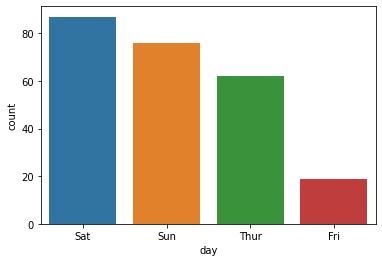

In [61]:
sns.countplot(x = 'day', data = tips, 
              order = tips['day'].value_counts().index) # order에 인덱스가 전달되면 그 순서대로 보여줌
plt.show()

<b>각각의 숫자 표현하기</b>

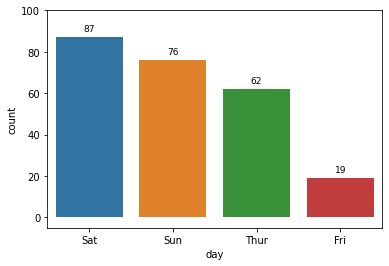

In [67]:
ax = sns.countplot(x = 'day', data = tips, 
              order = tips['day'].value_counts().index) 

for p in ax.patches: # ax.patches : countplot으로 만들어진 그래프 객체들(여기서는 4가지)
    height = p.get_height() # 각 객체의 높이값을 얻는다
    ax.text(p.get_x() + p.get_width()/2., # x
            height + 3, # y
            height, # s가 뭐지? - 값을 의미하는 듯.. 어디서 찾아야 되냐 정보를
            ha = 'center', 
            size = 9)
ax.set_ylim(-5, 100)
plt.show()

#### Hue 옵션 추가 : 그룹 간의 비교

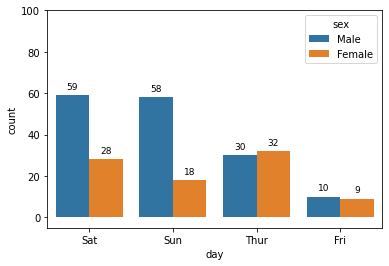

In [75]:
ax = sns.countplot(x='day',
                   data = tips,
                   hue = 'sex',
                  dodge = True, # 디폴트 값이 True임 : hue로 나눈 두 기준을 나눠서 표시할 거면 True, 합칠 거면 False
                  order = tips['day'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, height, ha = 'center', size = 9)
    ax.set_ylim(-5, 100)

plt.show()

### 5. 상관관계 히트맵
- 상관관계 분석은 일반적으로 Pearson Correlation Anaylsis를 의미함 (우리가 아는 상관계수 R)
- <b> 공분산(Covariance) : X 변수와 Y 변수가 동시에 변하는 정도의 양을 표현 </b>
    - x 편차와 y 편차의 곱의 평균값
    - 대칭행렬
    - 값의 의미 : + 면 양의 선형 관계, - 면 음의 선형 관계
    - 그러나 공분산의 크기는 Scale에 영향을 받아 일정 값을 가질 수 없기 때문에, 표준화 작업을 진행해야 한다.
    - 이를 보완한 게 상관관계
- <b> 상관관계(Correlation) : 공분산을 표준화한 값. r로 표시됨 </b>
    - 실무적으로는 결과에 대한 해석이 더 중요하며, 1에 가깝다면 상관관계가 있다(-1도 음의 상관관계)
    - 0에 가깝다면 상관관계가 없다고 얘기한다
    - 물론 어떤 값부터 상관관계가 있냐 여부를 얘기하려면 경험적인 영역으로 들어가는 것 같음. 분야에 따라서도 다르고

In [76]:
mpg = sns.load_dataset("mpg")
print(mpg.shape)

num_mpg = mpg.select_dtypes(include = np.number) # 모-든 수치에 대한 데이터만 선택함
print(num_mpg.shape)

(398, 9)
(398, 7)


In [78]:
num_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


#### df.corr() 메서드로 상관 계수를 간단하게 뽑아낼 수 있음

In [80]:
num_mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


#### 이를 히트맵으로 옮기자

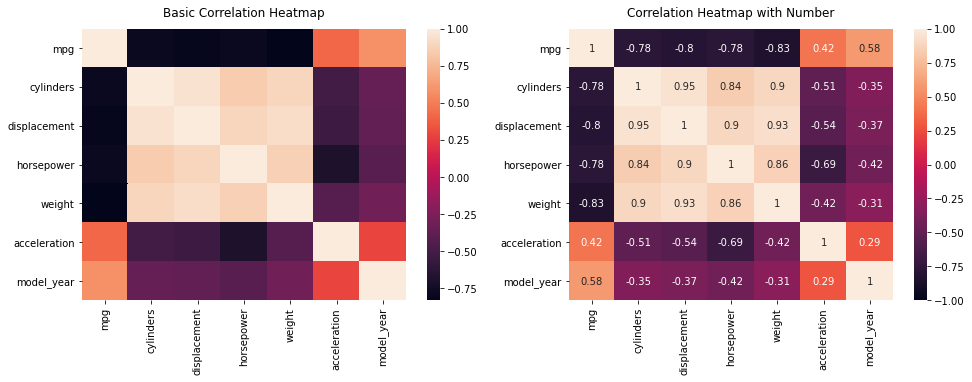

In [86]:
fig, ax = plt.subplots(1, 2, figsize = (16,5))

sns.heatmap(num_mpg.corr(), ax = ax[0])
ax[0].set_title('Basic Correlation Heatmap', pad = 12)

sns.heatmap(num_mpg.corr(), 
            # 값의 최대 ~ 최솟값 표시 : 색깔 기준 값이므로 바운더리를 맞춰주자
            vmin = -1, 
            vmax = 1,
            annot = True, # 값을 히트맵 내부에 표시
            ax = ax[1])
ax[1].set_title('Correlation Heatmap with Number', pad = 12)

plt.show()

- 상관관계 그래프는 대칭행렬이다. 즉 우측 상단이나 좌측 하단을 제거할 수 있는데, 이는 일종의 트릭으로 제거할 수 있다.

In [91]:
mask = np.triu(np.ones_like(num_mpg.corr(), dtype = np.bool)) #np.triu : upper triangle matrix
                                      # np.ones_like() 내부에 들어가는 건 행렬의 shape인 듯?
# 이를 변수로 지정한 뒤 dtype만 np.bool로 바꾸고 sns.heatmap() 내부에 mask 패러미터로 전달하면 된다.

<ipython-input-91-0119284dcb4e>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(num_mpg.corr(), dtype = np.bool)) #np.triu : upper triangle matrix


<ipython-input-92-b4c12ab9289c>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


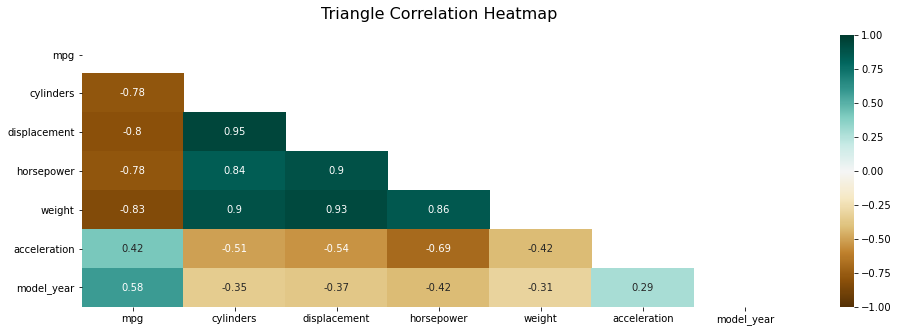

In [92]:
fig, ax = plt.subplots(figsize = (16, 5))

ax = sns.heatmap(num_mpg.corr(), mask = mask,
                vmin = -1, vmax = 1,
                annot = True,
                cmap = 'BrBG', 
                cbar = True)
ax.set_title('Triangle Correlation Heatmap', pad = 16, size = 16)
fig.show()

### 블로그 예제
- 원본 : https://jehyunlee.github.io/2020/08/27/Python-DS-28-mpl_spines_grids/

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator, FuncFormatter
import seaborn as sns
import numpy as np

- Ticker : 축의 눈금
    - MultipleLocator : 눈금을 숫자의 배수만큼 표시
    - AutoMinorLocator : 2개의 주 눈금 사이의 보조 눈금을 4~5개씩 배치
    - FuncFormatter : 사용자 정의 함수로 구현된 Label의 세팅을 사용하도록 도와줌

In [2]:
def plot_example(ax, zorder = 0):
    """ 
    [패러미터 설명]       
    ax : 객체이면서 반환값
    zorder : z + order : 값이 클수록 더 낮은 값을 가진 그래프 구성요소보다 위에 나옴
    """
    
    # 그냥 막대그래프인 건 알 거임
    ax.bar(
        tips_day['day'], 
        tips_day['tip'],
        color = 'lightgray',
        zorder = zorder
    )
    ax.set_title("tip(mean)", fontsize = 16, pad = 12)
    
    """
    반복문 : 각 숫자를 막대그래프 위에 표시하기 위함
    단 일요일은 일부러 색깔만 조금 다르게 지정(대비)
    """
    # Values
    h_pad = 0.1
    for i in range(4):
        fontweight = "normal"
        color = "k"
        if i == 3: # 책에는 i = 3으로 나옴
            fontweight = 'bold'
            color = 'darkred'
        ax.text(i, 
                tips_day['tip'].loc[i] + h_pad,
               f"{tips_day['tip'].loc[i]:0.2f}", 
                horizontalalignment = 'center',
               fontsize = 12,
               fontweight = fontweight,
               color = color)
    
    # Sunday
    ax.patches[3].set_facecolor('darkred')
    ax.patches[3].set_edgecolor('black')
    
    # set_range
    ax.set_ylim(0, 4)
    return ax

<b>왜 함수화했을까?</b>
- 틀만 이렇게 함수로 잡아놓고 상황마다 다르게 쓰기 위함임
- 실제로 블로그에서는 나머지인 Spines와 Grid에 집중하기 위해 이렇게 구현해놨음. 보면서 확인

#### Formatter 변환 - 사용자 정의 함수를 FuncFormatter로 변환한다

In [3]:
def major_formatter(x, pos):
    return "{%.2f}"%x # 변경할 게 나중에 생긴다면 return 값만 수정하면 됨. 
                      # %.2f 의 의미는 알겠는데 뒤의 %x의 의미는 몰?루겠네요
formatter = FuncFormatter(major_formatter)

### 시각화 데이터 불러오기

In [4]:
tips = sns.load_dataset("tips")
tips_day = tips.groupby('day').mean().reset_index()
print(tips_day)

    day  total_bill       tip      size
0  Thur   17.682742  2.771452  2.451613
1   Fri   17.151579  2.734737  2.105263
2   Sat   20.441379  2.993103  2.517241
3   Sun   21.410000  3.255132  2.842105


### 시각화 구현하기 - Spines

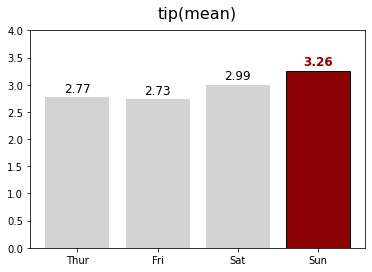

In [5]:
fig, ax = plt.subplots()
ax = plot_example(ax, zorder = 3)

#### 추가적으로 구현할 것들
<b>1. 사각형 테두리 없애기 (ax.spines)</b>

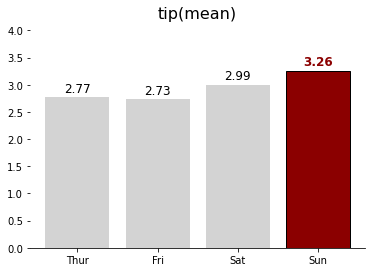

In [6]:
fig, ax = plt.subplots()
ax = plot_example(ax, zorder = 3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

- 그래프 전체의 위, 왼쪽, 오른쪽의 작대기(Spine)가 없어진 걸 확인할 수 있음
- 디폴트값이 True이기 때문에 기본적으로 블록쳐져서 나옴

<b>2. Ticker - 눈금 조정하기</b>

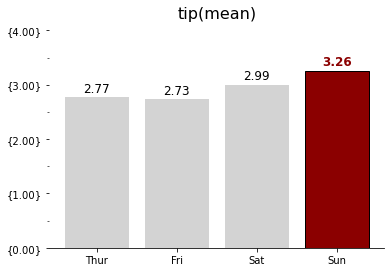

In [7]:
fig, ax = plt.subplots()
ax = plot_example(ax, zorder = 3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.yaxis.set_major_locator(MultipleLocator(1)) # 주요 눈금 표시 : 단위는 1
ax.yaxis.set_major_formatter(formatter) # # 위에서 정의된 값 : 소수점 2자리 표시와 {}가 들어간 거 확인
ax.yaxis.set_minor_locator(MultipleLocator(0.5)) # 보조 눈금 표시 : 단위 0.5

<b> 3. Grid </b>

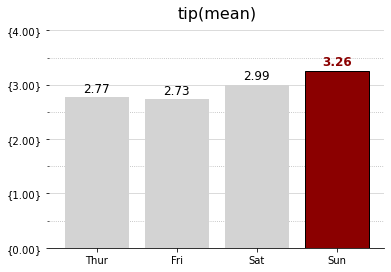

In [8]:
fig, ax = plt.subplots()
ax = plot_example(ax, zorder = 3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_formatter(formatter) 
ax.yaxis.set_minor_locator(MultipleLocator(0.5)) 

ax.grid(axis = 'y', which = 'major', color = 'lightgray') # 주 축에 대한 grid 표시
ax.grid(axis = 'y', which = 'minor', ls = ':') # 보조 축에 대한 grid 표시 / ls는 linestyle인 듯? 자세~~히 보면 점으로 되어 있음

<ipython-input-33-9f341e0acdb5>:79: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


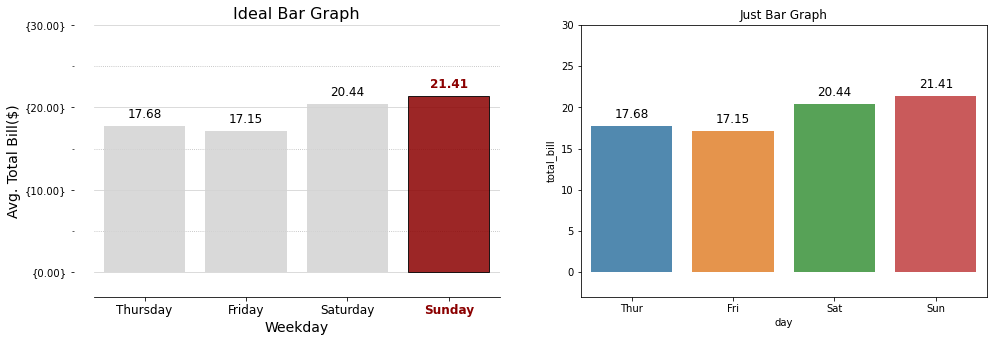

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))

""" 왼쪽 그래프 """

ax0 = sns.barplot(x = 'day',
                 y = 'total_bill',
                 data = tips,
                 ci = None,
                 color = 'lightgray',
                 alpha = 0.85,
                 zorder = 2,
                 ax = ax[0])

group_mean = tips.groupby(['day'])['total_bill'].agg('mean')

h_day = group_mean.sort_values(ascending = False).index[0]
h_mean = np.round(group_mean.sort_values(ascending = False)[0], 2)
for p in ax0.patches:
    fontweight = 'normal'
    color = 'k'
    height = np.round(p.get_height(), 2)
    if h_mean == height:
        fontweight = 'bold'
        color = 'darkred'
        p.set_facecolor(color)
        p.set_edgecolor('black')
    ax0.text(
         p.get_x() + p.get_width() / 2.,
         height + 1,
         height ,
         ha = 'center',
         size = 12,
         fontweight = fontweight,
         color = color)

ax0.set_ylim(-3, 30)
ax0.set_title('Ideal Bar Graph', size = 16)

ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(("outward", 20))
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

ax0.set_ylabel("Avg. Total Bill($)", fontsize = 14)

ax0.grid(axis = 'y', which = 'major', color = 'lightgray')
ax0.grid(axis = 'y', which = 'minor', ls=':')

ax0.set_xlabel("Weekday", fontsize = 14)
for xtick in ax0.get_xticklabels():
    if xtick.get_text() == h_day:
        xtick.set_color("darkred")
        xtick.set_fontweight("demibold")
ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size = 12)

""" 오른쪽 그래프 """

ax1 = sns.barplot(x='day',
                 y='total_bill',
                 data = tips,
                 ci = None, # 오차막대를 의미함
                 alpha = 0.85,
                 ax = ax[1])

for p in ax1.patches :
    height = np.round(p.get_height(), 2)
    ax1.text(p.get_x() + p.get_width() / 2., 
             height + 1,
            height,
            ha = 'center',
            size = 12)
ax1.set_ylim(-3, 30)
ax1.set_title("Just Bar Graph")

fig.show()

### 대부분의 데이터 시각화 책은 우측처럼 다루고 있지만, 시각화가 왜 필요한지를 생각해보자
- 실무에서 쓰려는 그래프는 왼쪽을 지향해야 한다.